<a href="https://colab.research.google.com/github/Darshil420/deeplearning_imageclassifier/blob/main/imageclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


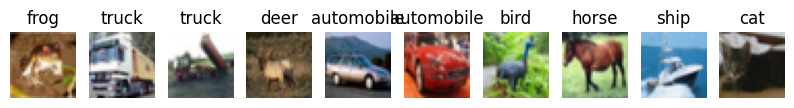

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

x_train,x_test=x_train/255.0,x_test/255.0
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(class_names[y_train[i]])
plt.show()


In [3]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),

    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history=model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.3518 - loss: 1.7533 - val_accuracy: 0.5547 - val_loss: 1.2457
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.5728 - loss: 1.2076 - val_accuracy: 0.6195 - val_loss: 1.0775
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6420 - loss: 1.0261 - val_accuracy: 0.6446 - val_loss: 1.0090
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6769 - loss: 0.9149 - val_accuracy: 0.6582 - val_loss: 0.9681
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7120 - loss: 0.8188 - val_accuracy: 0.6789 - val_loss: 0.9168
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7285 - loss: 0.7697 - val_accuracy: 0.7023 - val_loss: 0.8568
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7517 - loss: 0.7119 - val_accuracy: 0.7010 - val_loss: 0.8640
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7660 -

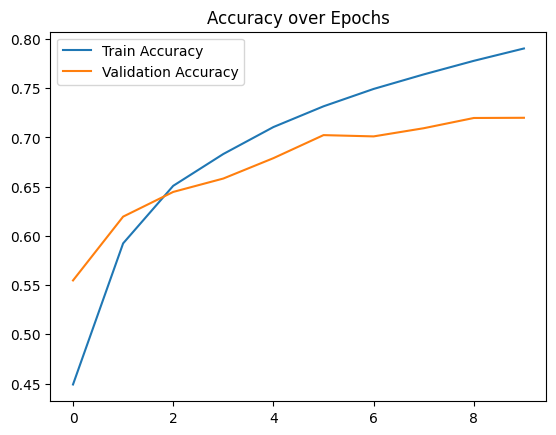

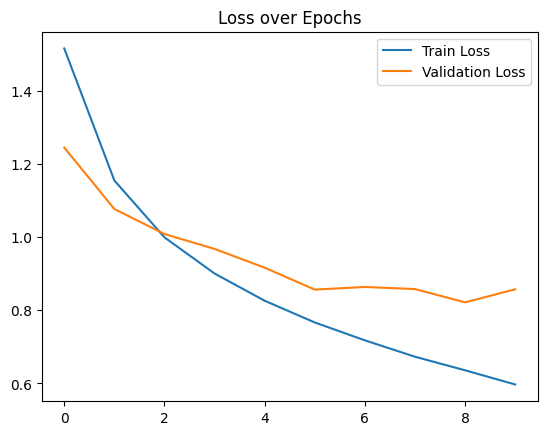

In [6]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


In [7]:
test_loss,test_acc=model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy: {test_acc*100:.2f}%')


313/313 - 3s - 10ms/step - accuracy: 0.7199 - loss: 0.8575
Test Accuracy: 71.99%


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


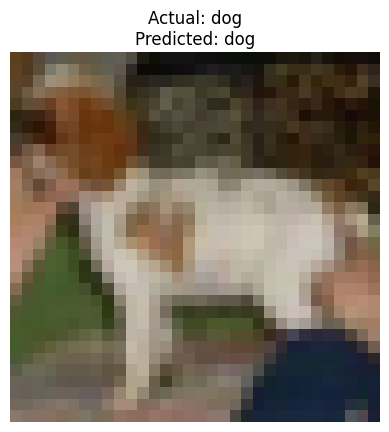

In [8]:
predictions=model.predict(x_test)

def show_prediction(i):
    plt.imshow(x_test[i])
    plt.title(f"Actual: {class_names[y_test[i]]}\nPredicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()

show_prediction(12)
